In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import string


In [172]:
df = pd.read_csv('./Documents/listings.csv')
df.head()

Ht = pd.read_csv('./Documents/Hawaii_Tourisim_Data.csv')
Ht

,Region,year,month,State,Attribute,Value
0,U.S. West,2019,All,All,Length of stay(days),8.65
1,U.S. East,2019,All,All,Length of stay(days),9.68
2,Japan,2019,All,All,Length of stay(days),5.90
3,Canada,2019,All,All,Length of stay(days),12.14
4,Europe,2019,All,All,Length of stay(days),12.91
...,...,...,...,...,...,...
232,All,2018,All,MAUI,Length of stay(days),8.07
233,All,2018,All,MOLOKA‘I,Length of stay(days),4.83
234,All,2018,All,LĀNA'I,Length of stay(days),3.41
235,All,2018,All,KAUA'I,Length of stay(days),7.48


In [189]:
Ht['Value']=pd.to_numeric(Ht['Value']) # convert the data type to numeric 
visitor_month=Ht.groupby('month',sort=False,as_index=False)['Value'].sum() #grouping by month and sorting to see the trend of visitors by month
visitor_month=visitor_month[visitor_month.month!='All'] # removing uncessary data

<BarContainer object of 12 artists>

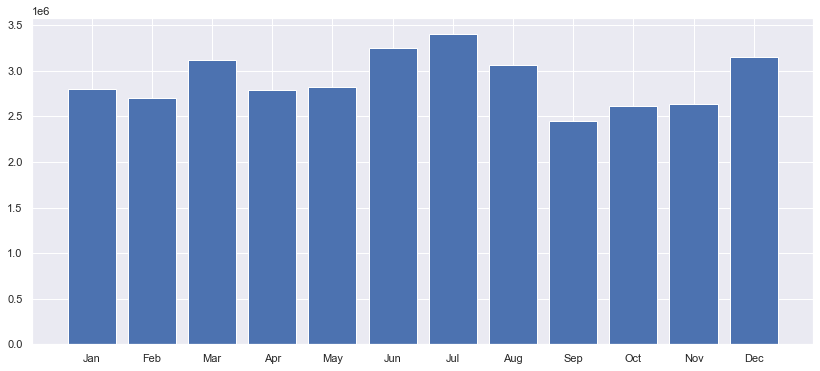

In [190]:
plt.bar(x=visitor_month["month"],height=visitor_month["Value"]) # plotting a bar chart sorted by month to identify trends

In [196]:
island_visitors=Ht.groupby(['State','Attribute'],sort=False)['Value'].sum() #grouping by month to see the trend of visitors by month
#island_visitors


In [197]:
island_visitors=Ht.groupby(['State','Attribute'],sort=False)['Value'].sum().reset_index(name='Value') # reseting the index 

In [198]:
island_visitors1=island_visitors[island_visitors.Attribute=='Visitor arrivals'] # filtering to visitor arrivals attribute

In [199]:
island_visitors1['Pct'] = (island_visitors1.Value/island_visitors1.Value.sum())*100 # calculating the percentage of visitors by island
island_visitors1

<ipython-input-199-4e68a0d21d81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  island_visitors1['Pct'] = (island_visitors1.Value/island_visitors1.Value.sum())*100 # calculating the percentage of visitors by island


,State,Attribute,Value,Pct
1,O'AHU,Visitor arrivals,12016605.67,34.509975
2,KAUA'I,Visitor arrivals,2759329.01,7.924399
3,MAUI COUNTY,Visitor arrivals,6074695.51,17.445658
4,MAUI,Visitor arrivals,5974816.80,17.158821
5,MOLOKA‘I,Visitor arrivals,121920.17,0.350137
6,LĀNA'I,Visitor arrivals,159113.26,0.456951
7,HAWAI'I ISLAND,Visitor arrivals,3470121.81,9.965694
8,HILO,Visitor arrivals,1201650.14,3.450968
9,KONA,Visitor arrivals,3042420.49,8.737397


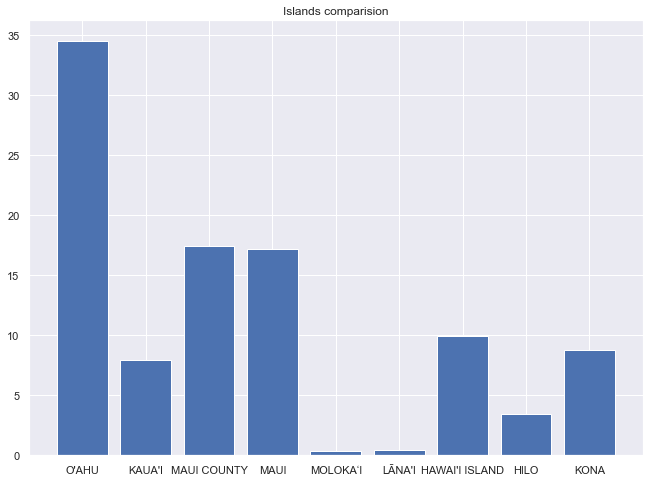

In [200]:
plt.bar(x=island_visitors1["State"],height=island_visitors1["Pct"]) # Plotting to visualize the trend
plt.title("Islands comparision")
fig = plt.gcf() # Adjusting the size of the graph to increase visibility
fig.set_size_inches(11,8)


In [218]:
Length_of_stay=Ht.groupby(['State','Attribute'])['Value'].mean() #Grouping by state and attribute to know the length of stay


In [229]:
Length_of_stay=Ht.groupby(['State','Attribute'],sort=False)['Value'].mean().reset_index(name='Value') # reseting the index


In [230]:
Length_of_stay=Length_of_stay[island_visitors.Attribute=='Length of stay(days)'] #Filtering to length of stay attribute
Length_of_stay

,State,Attribute,Value
0,All,Length of stay(days),9.731111
10,O'AHU,Length of stay(days),6.850000
11,MAUI,Length of stay(days),7.995000
12,MOLOKA‘I,Length of stay(days),4.685000
13,LĀNA'I,Length of stay(days),3.305000
14,KAUA'I,Length of stay(days),7.430000
15,HAWAI'I ISLAND,Length of stay(days),7.425000


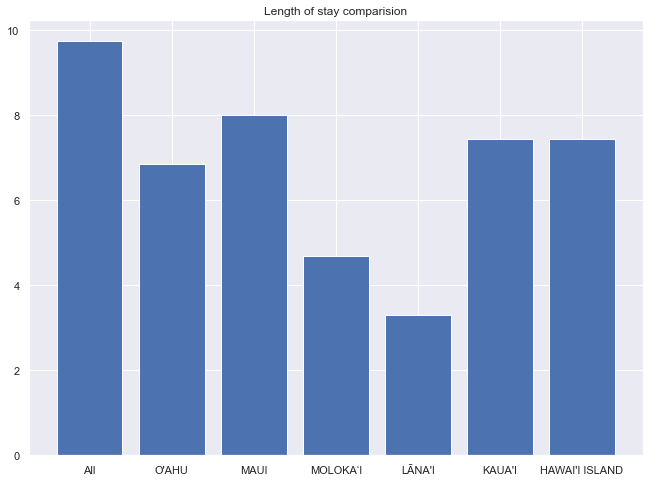

In [231]:
plt.bar(x=Length_of_stay["State"],height=Length_of_stay["Value"]) # Plotting to visualize the trend
plt.title("Length of stay comparision")
fig = plt.gcf()
fig.set_size_inches(11,8)

In [68]:
airbnb_reviews = df.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed'])['host_id'].agg('count') # Groupby islands 
# and neighrbourhoods to see the number of airbnbs listed


neighbourhood_group_cleansed  neighbourhood_cleansed
Hawaii                        Hamakua                     61
                              Kau                        152
                              North Hilo                  50
                              North Kohala                91
                              North Kona                2145
                              Puna                       862
                              South Hilo                 384
                              South Kohala              1080
                              South Kona                 236
Honolulu                      Central Oahu                38
                              East Honolulu              146
                              Ewa                        423
                              Koolauloa                  414
                              Koolaupoko                 444
                              North Shore Oahu           351
                              Pr

In [69]:
airbnb_reviews = airbnb_reviews.unstack(level=0) # unstack them to create a heatmap dataset

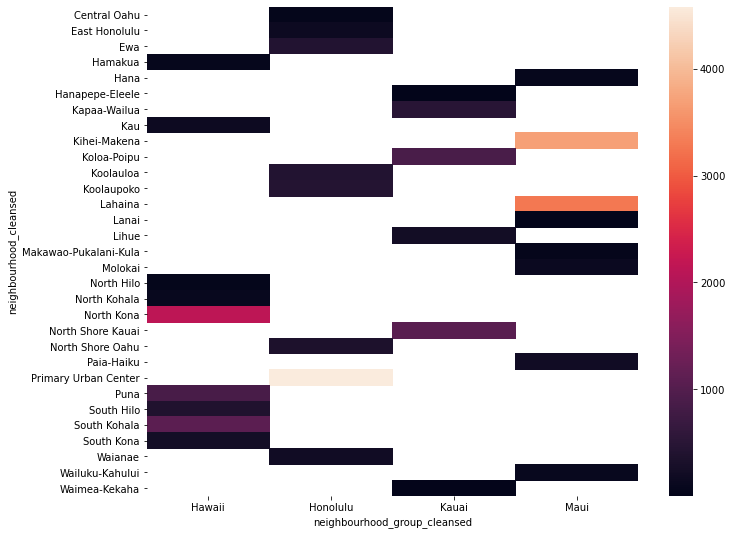

In [67]:
fig, ax = plt.subplots(figsize=(11, 9)) # adjusting the size of the plot for better visibility
sb.heatmap(airbnb_reviews) # generating a heatmap
plt.show()

In [110]:
#Trying to filter the signs from the number and get number

df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price']=pd.to_numeric(df['price']) # convert the data type to numeric 
airbnb_price_variations = df.groupby(['neighbourhood_group_cleansed'])['price'].sum().reset_index(name='price')
# grouping by price to understand the price variation across the airbnbs


,neighbourhood_group_cleansed,price
0,Hawaii,1530921.0
1,Honolulu,1920338.0
2,Kauai,1002294.0
3,Maui,3082690.0


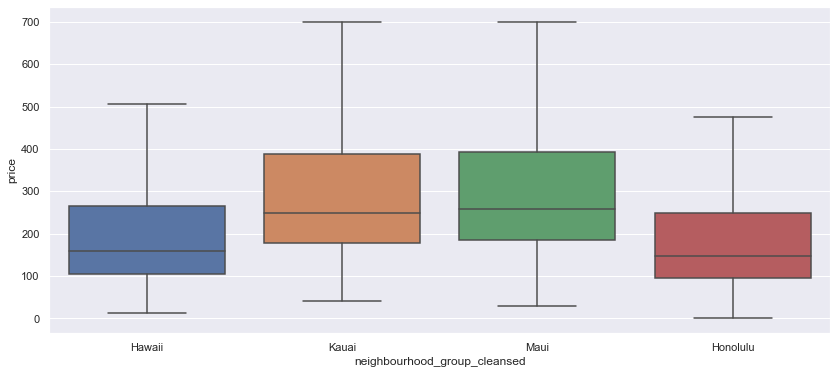

In [121]:
sb.set(rc={'figure.figsize':(14,6)}) # adjusting the size of the plot
df[['neighbourhood_group_cleansed','price']] # creating the dataset for plotting box plot
ax = sb.boxplot(x="neighbourhood_group_cleansed", y="price", data=df[['neighbourhood_group_cleansed','price']],showfliers=False)
# plotting the box plot by removing the outliers

In [127]:
airbnb_price_variations_sub = df.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed','host_id'])['price'].sum().reset_index(name='price') 
# Grouping by island and neighourhood to see the price variation

In [128]:
airbnb_price_variations_sub = airbnb_price_variations_sub[airbnb_price_variations_sub.neighbourhood_group_cleansed=='Hawaii']
# Filtering to Hawaii islands

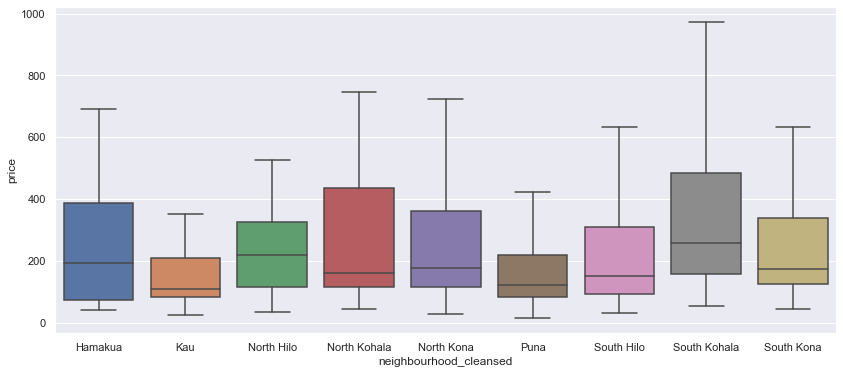

In [130]:
sb.set(rc={'figure.figsize':(14,6)})
ax = sb.boxplot(x="neighbourhood_cleansed", y="price", data=airbnb_price_variations_sub,showfliers=False)
# Plotting the price variation in Hawaii islands 

<ipython-input-170-c72b0d6c3563>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Reviews_check=df.groupby(['neighbourhood_cleansed','host_id'])['review_scores_value','number_of_reviews'].mean().reset_index()


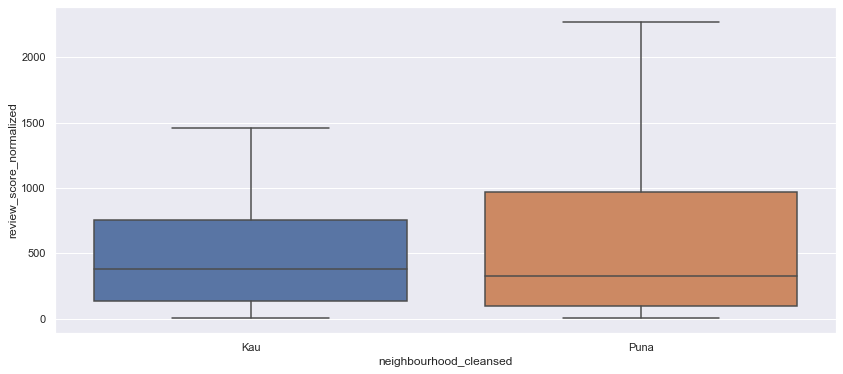

In [170]:
Reviews_check=df.groupby(['neighbourhood_cleansed','host_id'])['review_scores_value','number_of_reviews'].mean().reset_index()
# getting the review score value and number of reviews by neighbourhood
Reviews_check['review_score_normalized'] = Reviews_check.review_scores_value*Reviews_check.number_of_reviews
# Normalizing the scores to get a good KPI to measure the success of airbnbs
valuesin = ['Kau','Puna']
Reviews_check=Reviews_check[Reviews_check.neighbourhood_cleansed.isin(valuesin)] # Filtering to Kau and Puna region
Reviews_check =Reviews_check.dropna() # Dropping 'na' values to filter the data to only those airbnbs that have valid scores
#Reviews_check
sb.set(rc={'figure.figsize':(14,6)})
ax = sb.boxplot(x="neighbourhood_cleansed", y="review_score_normalized", data=Reviews_check,showfliers=False)
# Plotting to see the difference between the two regions